In [1]:
# Local paths
dir_pfx = './'
data_dir = dir_pfx + '../../data/Vehicules1024/'
# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append(dir_pfx)
sys.path.append('../')

In [2]:
#!pip3 install -q git+https://www.github.com/keras-team/keras-contrib.git
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from importlib import reload
import utils

Using TensorFlow backend.


In [3]:
#num_images = 3
#files = utils.scan_dataset(data_dir, num_images) #TODO: 50
#training_set, testing_set = utils.create_subsets(files, data_dir, use_validation=False)
#im_hr, im_lr, batch_idx = utils.load_data(0, training_set, data_dir, True, len(training_set))
vehicles_dir = dir_pfx + '../../data/vehicle_patches_64/'
#im_hr, im_lr = utils.load_data_vehicles(vehicles_dir, 1, img_spec=2021)
im_hr, im_lr = utils.load_data_vehicles(vehicles_dir, 3178, scale01=True)

using 3178 images
3178


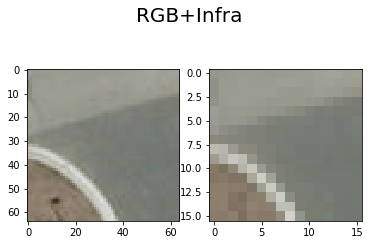

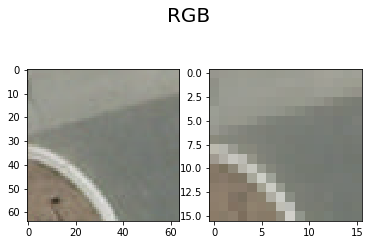

In [4]:
ix = 12
normalized_around_zero = False

if normalized_around_zero:
    plt.figure().suptitle('RGB+Infra', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(utils.un_normalize(im_hr[ix,:,:,:]))
    plt.subplot(1,2,2)
    plt.imshow(utils.un_normalize(im_lr[ix,:,:,:]))

    plt.figure().suptitle('RGB', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(utils.un_normalize(im_hr[ix,:,:,0:3]))
    plt.subplot(1,2,2)
    plt.imshow(utils.un_normalize(im_lr[ix,:,:,0:3]))
else:
    plt.figure().suptitle('RGB+Infra', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(im_hr[ix,:,:,:])
    plt.subplot(1,2,2)
    plt.imshow(im_lr[ix,:,:,:])

    plt.figure().suptitle('RGB', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(im_hr[ix,:,:,0:3])
    plt.subplot(1,2,2)
    plt.imshow(im_lr[ix,:,:,0:3])

In [ ]:
# Prototype the Dense SR GAN
#from importlib import reload
#reload(DenseSRGAN)

In [5]:
import DenseSRGAN
# Start
#gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,proj_pfx="OH",gpu_list=[5,7],dropout_rate=0.3)
# Continue
gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,proj_pfx="VEH",gpu_list=[2,4,6],dropout_rate=0.3,num_epochs_trained=200,weights_path='./weights/VEH/')


# Start
#gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,proj_pfx="OH",dropout_rate=0.3)
# Continue
#gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,proj_pfx="VEH",dropout_rate=0.3,num_epochs_trained=200,weights_path='./weights/VEH/')


#gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,dropout_rate=0.3)
#gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr[0:17,:,:,:],im_lr[0:17,:,:,:],dropout_rate=0.3)
#gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,num_gpus=[6],dropout_rate=0.3)
#gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,num_gpus=4,dropout_rate=0.3,weights_path='weights/')

In [ ]:
#gan.dropout_rate = .5 benchidx = 2000
gan.train(epochs=1000,verbose=False,bench_idx=2000,batch_size=16,save_interval=10,view_interval=5)

Finished Epoch 1205... Time: 0:00:28.270946
1205:97: [D loss_hr: 0.000001, acc_hr: 1.000000, loss_gen: 0.000000, acc_gen: 1.000000]  [A loss: 0.012651, acc: 1.000000]
Finished Epoch 1210... Time: 0:00:28.158632
1210:97: [D loss_hr: 0.000000, acc_hr: 1.000000, loss_gen: 0.000000, acc_gen: 1.000000]  [A loss: 0.000564, acc: 1.000000]
Saving weights at epoch 1210
Finished Epoch 1215... Time: 0:00:28.229026
1215:97: [D loss_hr: 0.000008, acc_hr: 1.000000, loss_gen: 0.000000, acc_gen: 1.000000]  [A loss: 0.002816, acc: 1.000000]
Finished Epoch 1220... Time: 0:00:28.530744
1220:97: [D loss_hr: 0.000002, acc_hr: 1.000000, loss_gen: 0.000000, acc_gen: 1.000000]  [A loss: 0.000000, acc: 1.000000]
Saving weights at epoch 1220
Finished Epoch 1225... Time: 0:00:28.383585
1225:97: [D loss_hr: 0.000028, acc_hr: 1.000000, loss_gen: 0.000000, acc_gen: 1.000000]  [A loss: 0.003389, acc: 1.000000]
Finished Epoch 1230... Time: 0:00:28.135810
1230:97: [D loss_hr: 0.000001, acc_hr: 1.000000, loss_gen: 0.00

In [ ]:
#self.disc.save(dir_pfx + 'weights/discriminator_weights.h5')

In [ ]:
np.min(im_lr[ix:ix+1,:,:,:])

In [ ]:
# 1117, 
ix = 10
ix2 = 11

img = gan.gen.predict(im_lr[ix:ix+1,:,:,:]).squeeze()
img = (img + 1)/2
plt.figure().suptitle('RGB+Infra', fontsize=20)
plt.subplot(1,2,1)
plt.imshow(im_hr[ix,:,:,:])
plt.subplot(1,2,2)
plt.imshow(img)

img = gan.gen.predict(im_lr[ix2:ix2+1,:,:,:]).squeeze()
img = (img + 1)/2
plt.figure().suptitle('RGB+Infra', fontsize=20)
plt.subplot(1,2,1)
plt.imshow(im_hr[ix2,:,:,:])
plt.subplot(1,2,2)
plt.imshow(img)

In [ ]:
floss = []
tloss = []

for i in np.random.randint(low=0,high=len(im_lr),size=(500)):
  tloss.append(gan.disc.predict(im_hr[i:i+1,:,:,:]).squeeze())
  floss.append(gan.disc.predict(gan.gen.predict(im_lr[i:i+1,:,:,:])).squeeze())

  
print('Mean Loss Real Images: {0}'.format(np.mean(tloss)))
print('Mean Loss False Images: {0}'.format(np.mean(floss)))


plt.figure()
plt.plot(list(range(len(tloss))),tloss)
plt.plot(list(range(len(floss))),floss)
plt.legend(['Loss Real Images','Loss Generated Images'])
plt.xlabel('Random Sample Number')
plt.ylabel('Cross Entropy Loss')
plt.show